In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

from StringIO import StringIO

import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
import cartopy.feature

import netCDF4

import datetime

I am not saying much today.  You are going to read in a netcdf file.  Plot sea surface temperatures.  Animate them for the year and turn in an animated GIF.  

If you go to this page it has daily sea surface temperatures in netcdf files.  
http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html#detail

here is what the data in our file might look [like](http://www.esrl.noaa.gov/psd/cgi-bin/GrADS.pl?dataset=NOAA+High-resolution+Blended+Analysis&DB_did=132&file=%2FDatasets%2Fnoaa.oisst.v2.highres%2Fsst.day.mean.1981.v2.nc+sst.day.mean.%25y4.v2.nc+12272&variable=sst&DB_vid=2423&DB_tid=45771&units=degC&longstat=Mean&DB_statistic=Mean&stat=&lat-begin=89.88S&lat-end=89.88N&lon-begin=0.13E&lon-end=359.88E&dim0=time&year_begin=1981&mon_begin=Sep&day_begin=1&year_end=1981&mon_end=Sep&day_end=1&X=lon&Y=lat&output=plot&bckgrnd=black&use_color=on&fill=lines&cint=&range1=&range2=&scale=100&maskf=%2FDatasets%2Fnoaa.oisst.v2.highres%2Flsmask.oisst.v2.nc&maskv=Land-sea+mask&submit=Create+Plot+or+Subset+of+Data)

What is a netcdf file??? Go check it out on wikipedia http://en.wikipedia.org/wiki/NetCDF

But it is a data file where the header describes the file and you can get all the data out into arrays.  It is used a lot in oceanography and atmospheric sciences.  So lets learn by doing.  I always feel like I am in a fog with netcdf because I don't use them much.  But at least lets get exposed so you could do it on your own next time.  Basically since we are looking at sea surface temperatures we will want a map as our final output

So download 2014 data http://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBListFiles.pl?did=132&tid=45771&vid=2423

This is big data.  the file is about 400mb

In [2]:
url=('sst.day.mean.2014.v2.nc')
f=netCDF4.Dataset(url)

In [3]:
print f

<type 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format UNDEFINED):
    Conventions: CF-1.5
    title: NOAA High-resolution Blended Analysis: Daily Values using AVHRR only
    institution: NOAA/NCDC
    source: NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html
    history: Version 1.0
    comment: Reynolds, et al., 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496.  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy NOAA17 NOAA18 AVHRR, Ice data: NCEP ice. Data less than 15 days old may be subject to revision.
    dimensions(sizes): time(365), lat(720), lon(1440)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 sst(time,lat,lon)
    groups: 



So what do we have?  We have 365 time steps of lat and long with sea surface temperatures at every day.  so lets try to pull it out.  It is easy....

In [15]:
print f.variables['time']

<type 'netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [ 78162.  78526.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.96920996839e+36 used



In [26]:
print f.variables['lat']

<type 'netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    actual_range: [-89.875  89.875]
    axis: Y
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.96920996839e+36 used



In [4]:
print f.variables['lon']

<type 'netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
    actual_range: [  1.25000000e-01   3.59875000e+02]
    axis: X
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.96920996839e+36 used



In [5]:
print f.variables['sst']

<type 'netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Daily Sea Surface Temperature
    units: degC
    valid_range: [ -3.  45.]
    missing_value: -9.96921e+36
    precision: 2.0
    dataset: NOAA High-resolution Blended Analysis
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Observations
    actual_range: [ -1.79999995  34.79999924]
unlimited dimensions: time
current shape = (365, 720, 1440)
filling on, default _FillValue of 9.96920996839e+36 used



Can we actually look at some numbers? 

In [27]:
f.variables['lat'][:]

array([-89.875, -89.625, -89.375, -89.125, -88.875, -88.625, -88.375,
       -88.125, -87.875, -87.625, -87.375, -87.125, -86.875, -86.625,
       -86.375, -86.125, -85.875, -85.625, -85.375, -85.125, -84.875,
       -84.625, -84.375, -84.125, -83.875, -83.625, -83.375, -83.125,
       -82.875, -82.625, -82.375, -82.125, -81.875, -81.625, -81.375,
       -81.125, -80.875, -80.625, -80.375, -80.125, -79.875, -79.625,
       -79.375, -79.125, -78.875, -78.625, -78.375, -78.125, -77.875,
       -77.625, -77.375, -77.125, -76.875, -76.625, -76.375, -76.125,
       -75.875, -75.625, -75.375, -75.125, -74.875, -74.625, -74.375,
       -74.125, -73.875, -73.625, -73.375, -73.125, -72.875, -72.625,
       -72.375, -72.125, -71.875, -71.625, -71.375, -71.125, -70.875,
       -70.625, -70.375, -70.125, -69.875, -69.625, -69.375, -69.125,
       -68.875, -68.625, -68.375, -68.125, -67.875, -67.625, -67.375,
       -67.125, -66.875, -66.625, -66.375, -66.125, -65.875, -65.625,
       -65.375, -65.

So we can pull out numbers and look at them.  They all come out in numpy arrays.  

In [6]:
type(f.variables['lat'][:])

numpy.ndarray

But we can pull them out and set them to a variable. We are not going to use Pandas and just leave everything in numpy arrays for today.  

In [7]:
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['sst'][:]
time=f.variables['time'][:]

In [9]:
shape(time)

(365L,)

In [10]:
shape(lon)

(1440L,)

In [11]:
shape(lat)

(720L,)

In [12]:
shape(sst)

(365L, 720L, 1440L)

So what do we have?  We have a lat/lon grid.  Then each point has a sst.  Then we have that repeated 365 times for each day of the year.  

Do you remember the easy way we plotted the Brian! Array? Well lets use that to look at one slice of the sst.   

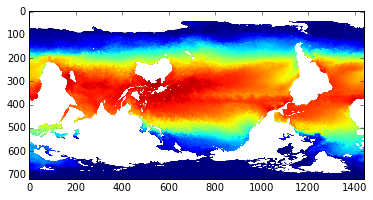

In [13]:
plt.imshow(sst[0])

What just happened?  This did not make a map?  It just took the sst array and plotted it.  Each array point has a latittude and longitude we could use to make a map.  But we didn't do that.  We just did a raw imshow which shows the array.  It is a nice start.   Read the help and see if you can flip the array? 

In [14]:
?plt.imshow

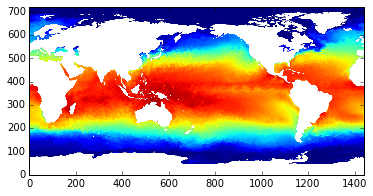

In [16]:
plt.imshow(sst[0],origin='lower')

imshow is nice as a quick way to show an array but it is not a map.  The next way to make a better map is pcolormesh.  It uses the lat and long so it is better but still not a map.  

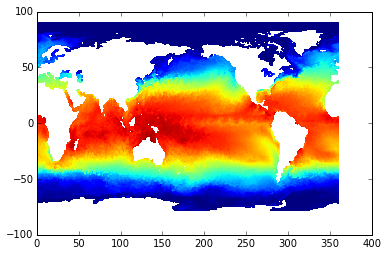

In [17]:
plt.pcolormesh(lon,lat,sst[0])

Lets try to make that nicer

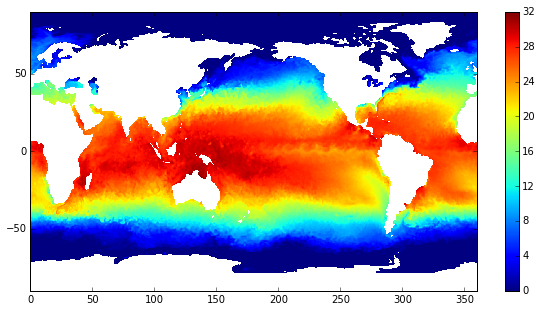

In [35]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
im=ax.pcolormesh(lon,lat,sst[0],vmax=32,vmin=0)
ax.set_xlim([0,360])
ax.set_ylim([-90,90])
cbar=fig.colorbar(im)

Now that is still not a proper map but it is a quick way to plot a lot of data.  We are not going to do more with the mapping.  We would need to decide between basemap and cartopy and I don't think it is worth our time.  You could easily look up basemap and make some maps.  I think this is a good start.  

Before I let you loose on your task we need to understand time a little more......  

In [36]:
print f.variables['time']

<type 'netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [ 78162.  78526.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.96920996839e+36 used



What does this mean?????  Time since 1801.  Holy crazy.  Lets look.

In [37]:
print time

[ 78162.  78163.  78164.  78165.  78166.  78167.  78168.  78169.  78170.
  78171.  78172.  78173.  78174.  78175.  78176.  78177.  78178.  78179.
  78180.  78181.  78182.  78183.  78184.  78185.  78186.  78187.  78188.
  78189.  78190.  78191.  78192.  78193.  78194.  78195.  78196.  78197.
  78198.  78199.  78200.  78201.  78202.  78203.  78204.  78205.  78206.
  78207.  78208.  78209.  78210.  78211.  78212.  78213.  78214.  78215.
  78216.  78217.  78218.  78219.  78220.  78221.  78222.  78223.  78224.
  78225.  78226.  78227.  78228.  78229.  78230.  78231.  78232.  78233.
  78234.  78235.  78236.  78237.  78238.  78239.  78240.  78241.  78242.
  78243.  78244.  78245.  78246.  78247.  78248.  78249.  78250.  78251.
  78252.  78253.  78254.  78255.  78256.  78257.  78258.  78259.  78260.
  78261.  78262.  78263.  78264.  78265.  78266.  78267.  78268.  78269.
  78270.  78271.  78272.  78273.  78274.  78275.  78276.  78277.  78278.
  78279.  78280.  78281.  78282.  78283.  78284.  7

In [39]:
78526/365

215

That makes sense.  It has been 215 years since 1801.  But how do we use it???

Luckily Python has a datetime module!!!  We have been using it in Pandas w/o you realizing it.  https://docs.python.org/2/library/datetime.html

Plus I had you import it above!   so type datetime. and hit tab and see what we got!

In [42]:
datetime.

In [44]:
datetime.datetime(

datetime.datetime

So lets add the year,month,day and see what happens

In [46]:
datetime.datetime(2015,4,10)

datetime.datetime(2015, 4, 10, 0, 0)

In [50]:
today=datetime.datetime(2015,4,10)
print today
type(today)

2015-04-10 00:00:00


datetime.datetime

So we can make ourselves a datetime!  plus datetime has a function called timedelta....

In [52]:
?datetime.timedelta

Now go back to https://docs.python.org/2/library/datetime.html and scroll down to the table.  It says we can do
Date2=date1+timedelta
date1=1800-01-01
timedelta=78526 days
Lets try it!

In [53]:
startdate=datetime.datetime(1800,01,01)
print startdate

1800-01-01 00:00:00


In [57]:
datedelta=datetime.timedelta(days=78526)
print datedelta

78526 days, 0:00:00


In [58]:
type(datedelta)

datetime.timedelta

In [59]:
print startdate+datedelta

2014-12-31 00:00:00


We could print the date nicely using format notation

In [65]:
print "The last date is {:%b %d, %Y}".format(startdate+datedelta)

The last date is Dec 31, 2014


Here is a summary https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

Awesome!!! The last sample is the last day of 2014!!! It worked!!! You are ready to go! 

The sst is for 365 days.  I want you to make an animated gif showing the sst every day of the year in a loop.  One hint is, you can make animated gifs in python but it is a pain. I would just use a website like. http://makeagif.com/    Good luck.  

http://www.esrl.noaa.gov/psd/data/gridded/tables/precipitation.html
may want to try precipitation